In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv('../src/datasets/ads/Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


#### Dividir dataset en entrenamiento y pruebas  80% Training 20% Testing

In [5]:
division=0.8
a=np.random.randn(len(data))
check=(a<division)
training=data[check]
testing=data[~check]
len(training), len(testing)

(165, 35)

In [6]:
import statsmodels.formula.api as smf
lm=smf.ols(formula="Sales~TV+Radio", data=training).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     742.2
Date:                Wed, 08 Jul 2020   Prob (F-statistic):           2.71e-82
Time:                        11:20:01   Log-Likelihood:                -314.77
No. Observations:                 165   AIC:                             635.5
Df Residuals:                     162   BIC:                             644.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9202      0.318      9.175      0.000       2.292       3.549
TV             0.0458      0.002     30.204      0.000       0.043       0.049
Radio          0.1886      0.009     21.765      0.000       0.171       0.206
==============================================================================
Omnibus:                       57.278   Durbin-Watson:                   2.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.038
Skew:                          -1.386   Prob(JB):                     1.19e-37
Kurtosis:                       7.129   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Modelo
### Sales= 2.7515 + 0.0468*TV + 0.1892*Radio

In [8]:
#Sales= 2.7515 + 0.0468*TV + 0.1892*Radio
sales_pred=lm.predict(testing)
sales_pred


0      20.588982
3      17.649026
5      12.541842
16     12.928861
20     18.148112
21     14.755741
42     21.592479
44      8.917217
55     21.347831
61     22.942225
70     17.811093
78      8.807072
79      9.685677
93     21.296484
94     10.480027
97     15.350022
107     7.117401
109    19.691924
110    14.809125
118    15.637424
129     7.913432
131    15.614112
132     8.435229
149     9.833812
151    10.046719
156    15.425734
162    14.963358
167    13.373038
172     7.609077
176    19.993724
178    16.027677
182     6.569450
195     5.367777
196     8.159065
197    12.781424
dtype: float64

In [10]:
SSD= sum((testing['Sales']-sales_pred)**2)
SSD


118.49570632860465

In [11]:
RSE=np.sqrt(SSD/len(testing)-2-1)
RSE


0.6209602317288158

In [13]:
sales_mean=np.mean(testing['Sales'])
error=RSE/sales_mean
error
#El modelo no sufre problemas de overfitting

0.045268919205391694

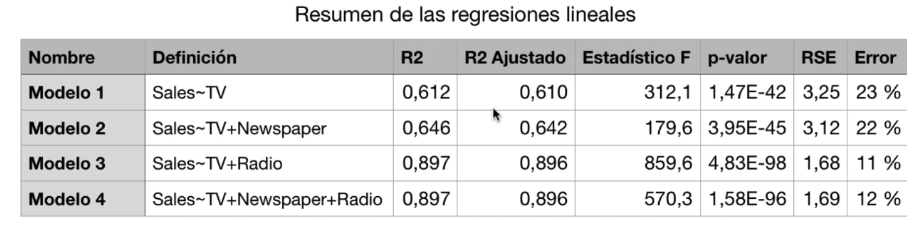

In [17]:
from IPython.display import Image
Image(filename="../src/img/resumen_LR_models.png")

## VID 89 Al presentar un Informe se debe tener los siguientes datos
* Nombre modelo
* Definición
* R2
* R2 Ajustado
* Estadistico F
* P-Valor
* RSE ->Error estándar de los residuos
* Error

#### Un estadistico F que incrementa es una mejora en el modelo
#### Multicolinealidad error => cual valirable eliminar, varianza mas grande 
##### Se deberá tener en cuenta